In [2]:
import pandas as pd 
import os 
os.getcwd()
os.chdir('C:/Users/acorn/Desktop')
df = pd.read_csv('./acorn_file/BankChurners.csv')

In [3]:
# module import 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import sklearn
import statsmodels.api as sm

In [7]:
# 인코딩 진행 
bank = df.copy()
bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
bank.drop(['CLIENTNUM'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank['Attrition_Flag'] = encoder.fit_transform(bank[['Attrition_Flag']])
bank.Gender = encoder.fit_transform(bank[['Gender']])
bank.Marital_Status = encoder.fit_transform(bank[['Marital_Status']])
bank.Education_Level = encoder.fit_transform(bank[['Education_Level']])
bank.Income_Category = encoder.fit_transform(bank[['Income_Category']])
bank.Card_Category = encoder.fit_transform(bank[['Card_Category']])


c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.p

In [8]:
bank

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [83]:
y = bank['Attrition_Flag']
X = bank.drop('Attrition_Flag', axis = 1)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [123]:
from imblearn.over_sampling import SMOTE

smote_enn = SMOTE(random_state=42)

# 혼합 샘플링 수행
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# 결과 확인
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y distribution: {pd.Series(y_resampled).value_counts()}")

Resampled X shape: (13602, 19)
Resampled y distribution: Attrition_Flag
1    6801
0    6801
Name: count, dtype: int64


In [124]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(8101, 19) (2026, 19) (8101,) (2026,)


In [125]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(max_depth = 3,random_state=42)
# model.fit(X_train,y_train)

model = DecisionTreeClassifier(max_depth = 3,random_state=42)
model.fit(X_resampled,y_resampled)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [126]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = model.predict(X_resampled)
y_pred_test = model.predict(X_test)

# 훈련 및 테스트 세트의 정확도 계산
train_accuracy = accuracy_score(y_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}")
report = classification_report(y_resampled, y_pred_train)
print(report)
print(f"\nTest Accuracy: {test_accuracy}")
report_ = classification_report(y_test, y_pred_test)
print(report_)


Train Accuracy: 0.8639905896191736
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      6801
           1       0.82      0.94      0.87      6801

    accuracy                           0.86     13602
   macro avg       0.87      0.86      0.86     13602
weighted avg       0.87      0.86      0.86     13602


Test Accuracy: 0.9155972359328727
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       327
           1       0.95      0.95      0.95      1699

    accuracy                           0.92      2026
   macro avg       0.84      0.85      0.85      2026
weighted avg       0.92      0.92      0.92      2026



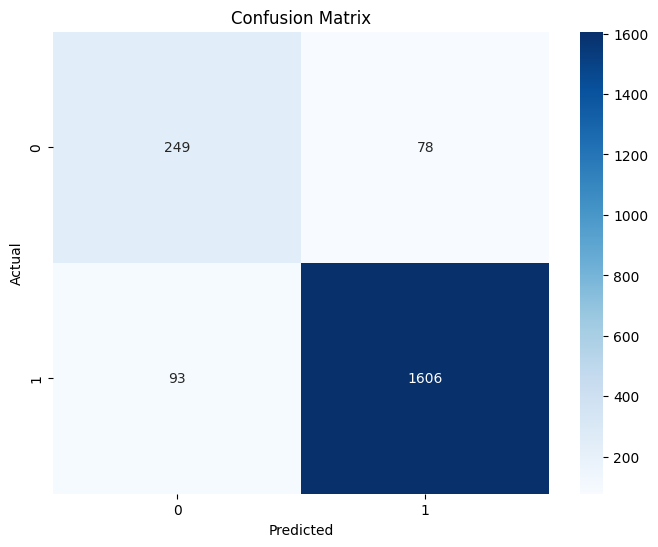

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred_test)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\acorn\AppData\Local\Temp\ipykernel_17788\2861789580.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)


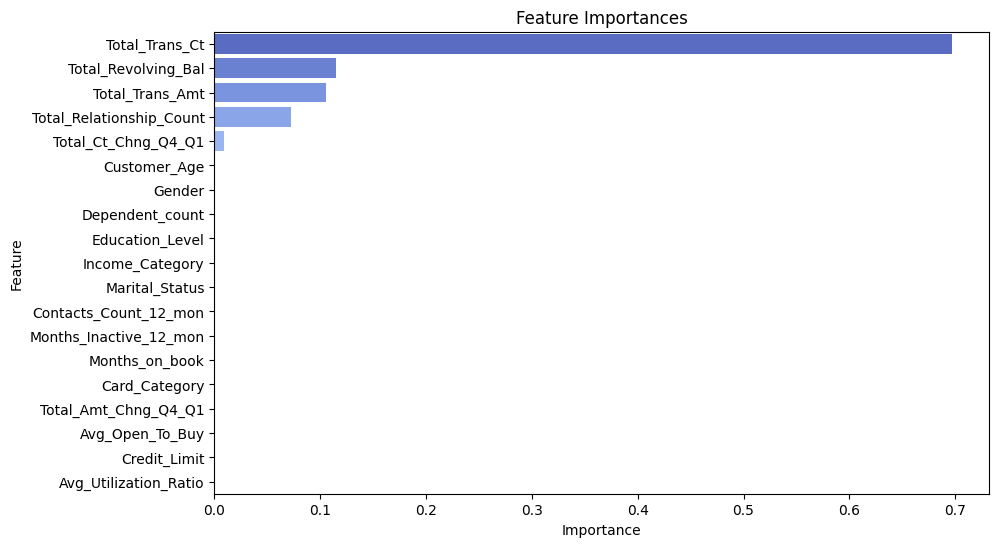

In [130]:
# 중요 변수 추출 및 시각화
feature_importances = model.feature_importances_
features = X_resampled.columns

# 시각화
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(importance_df))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)
plt.title('Feature Importances')
plt.show()


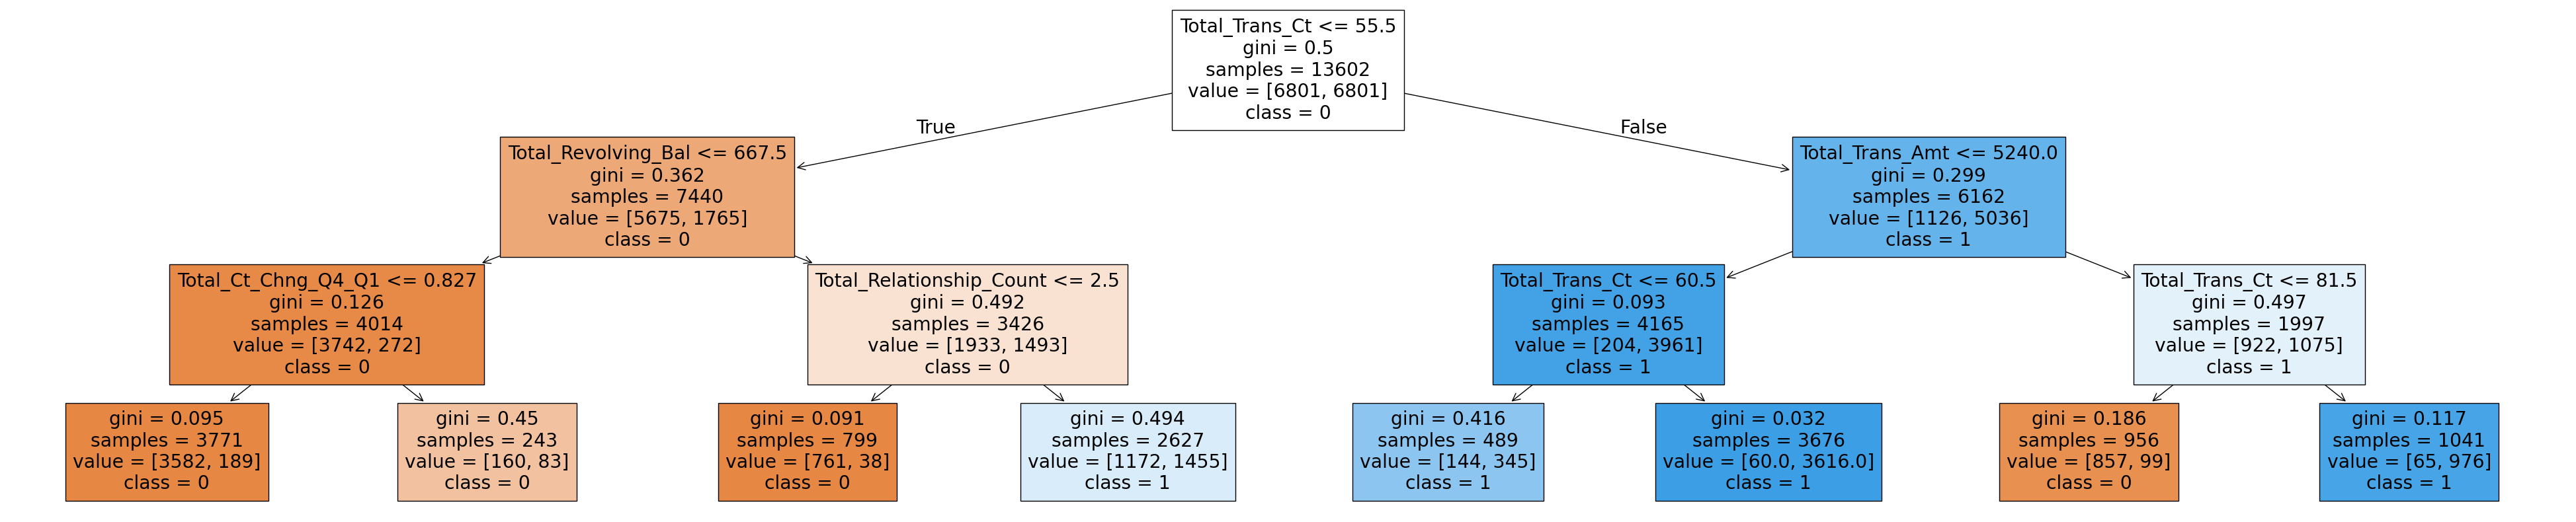

In [131]:
from sklearn import tree

# X_train의 열 이름을 문자열로 변환
feature_names = [str(col) for col in X_resampled.columns]

# 클래스 이름을 문자열로 변환
class_names = [str(cls) for cls in model.classes_]

# 의사결정나무 시각화
plt.figure(figsize=(50,10))
tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()



In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=3,random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [70]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 훈련 및 테스트 세트의 정확도 계산
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}")
report = classification_report(y_train, y_pred_train)
print(report)
print(f"\nTest Accuracy: {test_accuracy}")
report_ = classification_report(y_test, y_pred_test)
print(report_)


Train Accuracy: 0.9012467596593013
              precision    recall  f1-score   support

           0       0.91      0.43      0.58      1300
           1       0.90      0.99      0.94      6801

    accuracy                           0.90      8101
   macro avg       0.90      0.71      0.76      8101
weighted avg       0.90      0.90      0.89      8101


Test Accuracy: 0.8948667324777887
              precision    recall  f1-score   support

           0       0.91      0.39      0.54       327
           1       0.89      0.99      0.94      1699

    accuracy                           0.89      2026
   macro avg       0.90      0.69      0.74      2026
weighted avg       0.90      0.89      0.88      2026



In [135]:
random_fraction = X.sample(frac=0.4, random_state=42)


In [139]:
predictions = model.predict(random_fraction)

# 예측 결과 출력
print(f"Predictions: {predictions}")

Predictions: [1 1 1 ... 1 1 1]


In [140]:
probabilities = model.predict_proba(X)

# 예측 확률 출력
print(f"Prediction Probabilities: {probabilities}")

Prediction Probabilities: [[0.44613628 0.55386372]
 [0.44613628 0.55386372]
 [0.65843621 0.34156379]
 ...
 [0.89644351 0.10355649]
 [0.89644351 0.10355649]
 [0.89644351 0.10355649]]


In [142]:
pd.DataFrame(probabilities)

,0,1
0,0.446136,0.553864
1,0.446136,0.553864
2,0.658436,0.341564
3,0.446136,0.553864
4,0.658436,0.341564
...,...,...
10122,0.062440,0.937560
10123,0.896444,0.103556
10124,0.896444,0.103556
10125,0.896444,0.103556
